## transformation

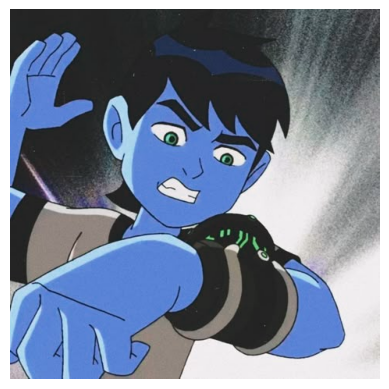

In [7]:
import cv2
import matplotlib.pyplot as plt
image = cv2.imread(r"C:\Users\student\Downloads\ben 10.jpg")
plt.imshow(image)
plt.axis('off')
plt.show()

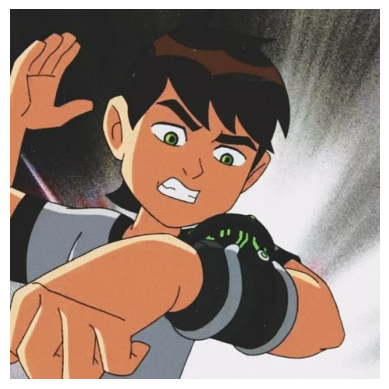

In [8]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis('off')
plt.show()



In [9]:
height, width = image.shape[:2]
print(height)
print(width)

474
474


## translation

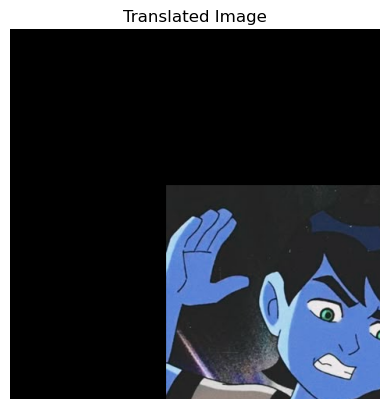

In [10]:
import numpy as np

height, width = image.shape[:2]

tx, ty = 200, 200 

translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])

translated_image = cv2.warpAffine(image, translation_matrix, (width, height))

plt.imshow(translated_image)
plt.title("Translated Image")
plt.axis("off")
plt.show()


## matrix based translation

In [5]:
height, width, channels = image.shape
print(height)
print(width)
print(channels)



1600
1920
3


In [16]:
tx, ty = 200, 200  

x, y = np.meshgrid(np.arange(width), np.arange(height))
print("x:",x)
print("y:",y)

x: [[  0   1   2 ... 471 472 473]
 [  0   1   2 ... 471 472 473]
 [  0   1   2 ... 471 472 473]
 ...
 [  0   1   2 ... 471 472 473]
 [  0   1   2 ... 471 472 473]
 [  0   1   2 ... 471 472 473]]
y: [[  0   0   0 ...   0   0   0]
 [  1   1   1 ...   1   1   1]
 [  2   2   2 ...   2   2   2]
 ...
 [471 471 471 ... 471 471 471]
 [472 472 472 ... 472 472 472]
 [473 473 473 ... 473 473 473]]


In [17]:
flat_x = x.flatten()
flat_y = y.flatten()
print(flat_x)
print(flat_y)

[  0   1   2 ... 471 472 473]
[  0   0   0 ... 473 473 473]


In [18]:
ones = np.ones_like(flat_x)
original_coords = np.stack([flat_x, flat_y, ones], axis=0)
print(original_coords)

[[  0   1   2 ... 471 472 473]
 [  0   0   0 ... 473 473 473]
 [  1   1   1 ...   1   1   1]]


In [19]:
translation_matrix = np.array([[1, 0, tx], [0, 1, ty], [0, 0, 1]])
print(translation_matrix)

[[  1   0 200]
 [  0   1 200]
 [  0   0   1]]


In [20]:
new_coords = translation_matrix @ original_coords
print(new_coords)

[[200 201 202 ... 671 672 673]
 [200 200 200 ... 673 673 673]
 [  1   1   1 ...   1   1   1]]


In [21]:
new_x, new_y = new_coords[:2].astype(int) 
print(new_x)
print(new_y)

[200 201 202 ... 671 672 673]
[200 200 200 ... 673 673 673]


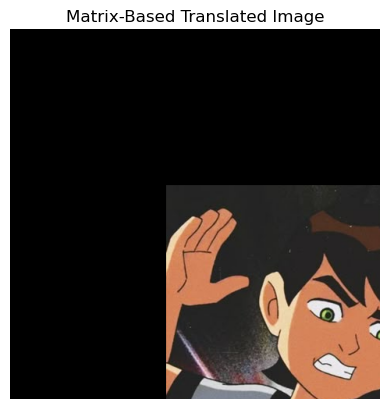

In [22]:

translated_image = np.zeros_like(image)
valid_idx = (new_x >= 0) & (new_x < width) & (new_y >= 0) & (new_y < height)

translated_image[new_y[valid_idx], new_x[valid_idx]] = image[flat_y[valid_idx], flat_x[valid_idx]]

plt.imshow(translated_image)
plt.title("Matrix-Based Translated Image")
plt.axis("off")
plt.show()


## rotation

In [23]:
height, width, channels = image.shape
print(height)
print(width)
print(channels)

474
474
3


In [24]:
theta = 45  
theta_rad = np.deg2rad(theta)
print(theta_rad)

0.7853981633974483


In [25]:
center_x, center_y = width // 2, height // 2
print(center_x)
print(center_y)

237
237


In [26]:
x, y = np.meshgrid(np.arange(width), np.arange(height))
print("x:",x)
print("y:",y)

x: [[  0   1   2 ... 471 472 473]
 [  0   1   2 ... 471 472 473]
 [  0   1   2 ... 471 472 473]
 ...
 [  0   1   2 ... 471 472 473]
 [  0   1   2 ... 471 472 473]
 [  0   1   2 ... 471 472 473]]
y: [[  0   0   0 ...   0   0   0]
 [  1   1   1 ...   1   1   1]
 [  2   2   2 ...   2   2   2]
 ...
 [471 471 471 ... 471 471 471]
 [472 472 472 ... 472 472 472]
 [473 473 473 ... 473 473 473]]


In [28]:
flat_x = x.flatten()
flat_y = y.flatten()
print(flat_x)
print(flat_y)

[  0   1   2 ... 471 472 473]
[  0   0   0 ... 473 473 473]


In [29]:
centered_x = flat_x - center_x
centered_y = flat_y - center_y
print(centered_x)
print(centered_y)

[-237 -236 -235 ...  234  235  236]
[-237 -237 -237 ...  236  236  236]


In [30]:
rotation_matrix = np.array([[np.cos(theta_rad), -np.sin(theta_rad)],
                            [np.sin(theta_rad), np.cos(theta_rad)]])
print(rotation_matrix)

[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [31]:
rotated_coords = rotation_matrix @ np.vstack([centered_x, centered_y])
print(rotated_coords)

[[   0.            0.70710678    1.41421356 ...   -1.41421356
    -0.70710678    0.        ]
 [-335.16861428 -334.4615075  -333.75440072 ...  332.34018716
   333.04729394  333.75440072]]


In [32]:
rotated_x = rotated_coords[0, :] + center_x
rotated_y = rotated_coords[1, :] + center_y
print(rotated_x)
print(rotated_y)


[237.         237.70710678 238.41421356 ... 235.58578644 236.29289322
 237.        ]
[-98.16861428 -97.4615075  -96.75440072 ... 569.34018716 570.04729394
 570.75440072]


In [33]:
rotated_x = np.round(rotated_x).astype(int)
rotated_y = np.round(rotated_y).astype(int)
print(rotated_x)
print(rotated_y)

[237 238 238 ... 236 236 237]
[-98 -97 -97 ... 569 570 571]


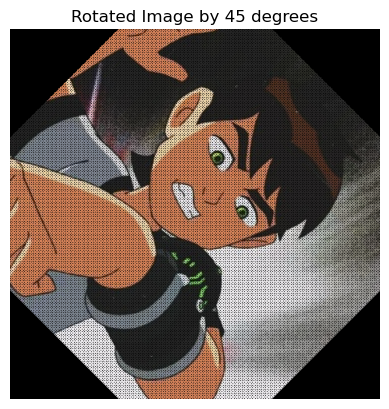

In [34]:
rotated_image = np.zeros_like(image)
valid_idx = (rotated_x >= 0) & (rotated_x < width) & (rotated_y >= 0) & (rotated_y < height)
rotated_image[rotated_y[valid_idx], rotated_x[valid_idx]] = image[flat_y[valid_idx], flat_x[valid_idx]]
plt.imshow(rotated_image)
plt.title(f"Rotated Image by {theta} degrees")
plt.axis("off")
plt.show()


## scaling

In [36]:
image = cv2.imread(r"C:\Users\student\Downloads\ben 10.jpg")
height, width, channels = image.shape
print(height)
print(width)
print(channels)

474
474
3


In [37]:
scale_x = 1.5 
scale_y = 1.5  
y, x = np.indices((height, width))  
print(x)
print(y)

[[  0   1   2 ... 471 472 473]
 [  0   1   2 ... 471 472 473]
 [  0   1   2 ... 471 472 473]
 ...
 [  0   1   2 ... 471 472 473]
 [  0   1   2 ... 471 472 473]
 [  0   1   2 ... 471 472 473]]
[[  0   0   0 ...   0   0   0]
 [  1   1   1 ...   1   1   1]
 [  2   2   2 ...   2   2   2]
 ...
 [471 471 471 ... 471 471 471]
 [472 472 472 ... 472 472 472]
 [473 473 473 ... 473 473 473]]


In [38]:
scaled_x = scale_x * (x - width // 2) + width // 2  
scaled_y = scale_y * (y - height // 2) + height // 2 
scaled_x = np.round(scaled_x).astype(int)
scaled_y = np.round(scaled_y).astype(int)
print(scaled_x)
print(scaled_y)

[[-118 -117 -116 ...  588  590  591]
 [-118 -117 -116 ...  588  590  591]
 [-118 -117 -116 ...  588  590  591]
 ...
 [-118 -117 -116 ...  588  590  591]
 [-118 -117 -116 ...  588  590  591]
 [-118 -117 -116 ...  588  590  591]]
[[-118 -118 -118 ... -118 -118 -118]
 [-117 -117 -117 ... -117 -117 -117]
 [-116 -116 -116 ... -116 -116 -116]
 ...
 [ 588  588  588 ...  588  588  588]
 [ 590  590  590 ...  590  590  590]
 [ 591  591  591 ...  591  591  591]]


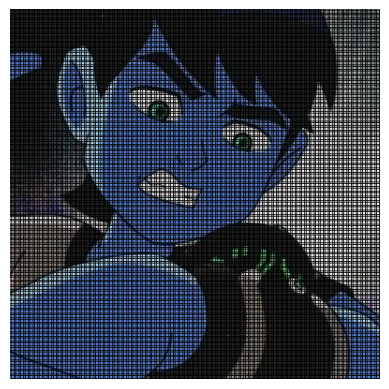

In [39]:
valid_idx = (scaled_x >= 0) & (scaled_x < width) & (scaled_y >= 0) & (scaled_y < height)

# Create an output image with the same dimensions
scaled_image = np.zeros_like(image)

# Map the scaled coordinates to the output image
scaled_image[scaled_y[valid_idx], scaled_x[valid_idx]] = image[y[valid_idx], x[valid_idx]]

# Display the scaled image
plt.imshow(scaled_image)
plt.axis('off')
plt.show()


## shearing

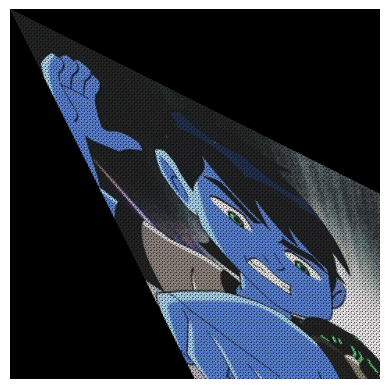

In [40]:

height, width = image.shape[:2]


sh_x = 0.5  
sh_y = 0.5  


y, x = np.indices((height, width))  


sheared_x = x + sh_x * y


sheared_y = y + sh_y * x


sheared_x = np.round(sheared_x).astype(int)
sheared_y = np.round(sheared_y).astype(int)


valid_idx = (sheared_x >= 0) & (sheared_x < width) & (sheared_y >= 0) & (sheared_y < height)


sheared_image = np.zeros_like(image)


sheared_image[sheared_y[valid_idx], sheared_x[valid_idx]] = image[y[valid_idx], x[valid_idx]]


plt.imshow(sheared_image)
plt.axis('off')
plt.show()


## reflection

In [42]:
image = cv2.imread(r"C:\Users\student\Downloads\ben 10.jpg")
height, width = image.shape[:2]
print(height)
print(width)


474
474


In [43]:
y, x = np.indices((height, width))
print(x)
print(y)

[[  0   1   2 ... 471 472 473]
 [  0   1   2 ... 471 472 473]
 [  0   1   2 ... 471 472 473]
 ...
 [  0   1   2 ... 471 472 473]
 [  0   1   2 ... 471 472 473]
 [  0   1   2 ... 471 472 473]]
[[  0   0   0 ...   0   0   0]
 [  1   1   1 ...   1   1   1]
 [  2   2   2 ...   2   2   2]
 ...
 [471 471 471 ... 471 471 471]
 [472 472 472 ... 472 472 472]
 [473 473 473 ... 473 473 473]]


In [44]:
reflected_x = width - 1 - x
print(reflected_x)

[[473 472 471 ...   2   1   0]
 [473 472 471 ...   2   1   0]
 [473 472 471 ...   2   1   0]
 ...
 [473 472 471 ...   2   1   0]
 [473 472 471 ...   2   1   0]
 [473 472 471 ...   2   1   0]]


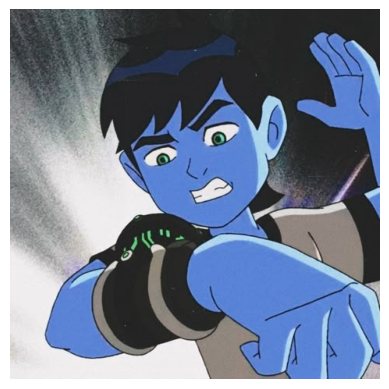

In [45]:
reflected_x = np.clip(reflected_x, 0, width - 1)
reflected_image = np.zeros_like(image)
reflected_image[y, reflected_x] = image[y, x]
plt.imshow(reflected_image)
plt.axis('off')
plt.show()
